## SP500 and Msci ACWI

In [1]:
import yfinance as yf
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
import plotly.express as px
from pandas.plotting import scatter_matrix

In [2]:
tickers = ['ACWI', '^GSPC']

In [3]:
data = yf.download(tickers)

[*********************100%***********************]  2 of 2 completed


In [4]:
data.head()

Adj Close        Close        High         Low        Open         \
                ACWI  ^GSPC  ACWI  ^GSPC ACWI  ^GSPC ACWI  ^GSPC ACWI  ^GSPC   
Date                                                                           
1950-01-03       NaN  16.66   NaN  16.66  NaN  16.66  NaN  16.66  NaN  16.66   
1950-01-04       NaN  16.85   NaN  16.85  NaN  16.85  NaN  16.85  NaN  16.85   
1950-01-05       NaN  16.93   NaN  16.93  NaN  16.93  NaN  16.93  NaN  16.93   
1950-01-06       NaN  16.98   NaN  16.98  NaN  16.98  NaN  16.98  NaN  16.98   
1950-01-09       NaN  17.08   NaN  17.08  NaN  17.08  NaN  17.08  NaN  17.08   

           Volume           
             ACWI    ^GSPC  
Date                        
1950-01-03    NaN  1260000  
1950-01-04    NaN  1890000  
1950-01-05    NaN  2550000  
1950-01-06    NaN  2010000  
1950-01-09    NaN  2520000

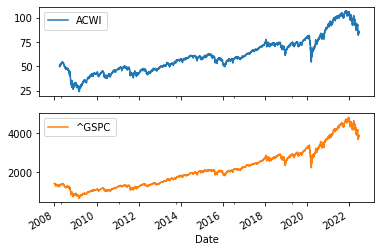

In [5]:
data.Close.loc['2008':].plot(subplots=True);

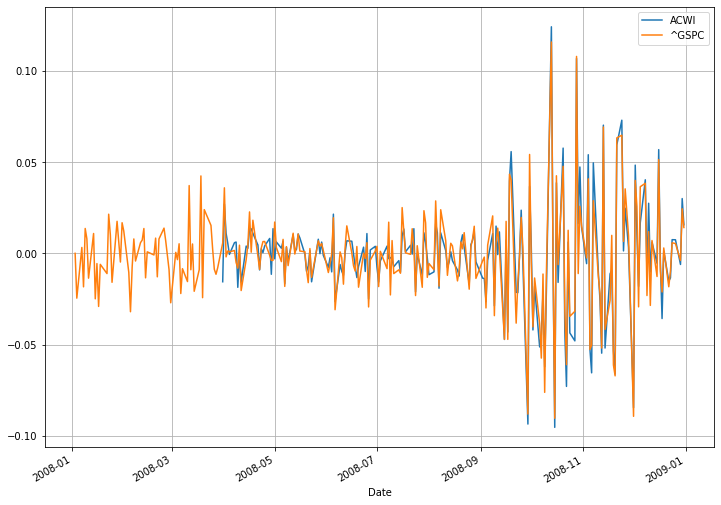

In [6]:
data.Close.loc['2008'].pct_change().plot(grid=True, figsize=(12,9));

In [7]:
data['pct_ACWI'] = data.Close.ACWI.pct_change()
data['pct_SP500'] = data.Close['^GSPC'].pct_change()

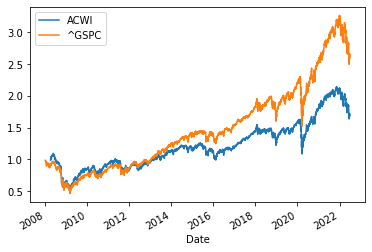

In [8]:
rets = np.log(data / data.shift(1))
rets.Close.loc['2008':].cumsum().apply(np.exp).plot();

In [9]:
def normalize_data(df):
    norm_data = np.log(df / df.shift(1))
    
    return norm_data

In [10]:
normalize_data(data)

Adj Close               Close                High            \
                ACWI     ^GSPC      ACWI     ^GSPC      ACWI     ^GSPC   
Date                                                                     
1950-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
1950-01-04       NaN  0.011340       NaN  0.011340       NaN  0.011340   
1950-01-05       NaN  0.004737       NaN  0.004737       NaN  0.004737   
1950-01-06       NaN  0.002949       NaN  0.002949       NaN  0.002949   
1950-01-09       NaN  0.005872       NaN  0.005872       NaN  0.005872   
...              ...       ...       ...       ...       ...       ...   
2022-06-22 -0.005747 -0.001302 -0.005747 -0.001302  0.000713  0.005841   
2022-06-23  0.005747  0.009487  0.005747  0.009487 -0.002737  0.000208   
2022-06-24  0.029990  0.030106  0.029990  0.030106  0.028548  0.028791   
2022-06-27 -0.002901 -0.002977 -0.002901 -0.002977  0.003122  0.003589   
2022-06-28 -0.014867 -0.020349 -0.014867 -0.020349  0.004953  0.004608   

                 Low                Open              Volume            \
                ACWI     ^GSPC      ACWI     ^GSPC      ACWI     ^GSPC   
Date                                                                     
1950-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
1950-01-04       NaN  0.011340       NaN  0.011340       NaN  0.405465   
1950-01-05       NaN  0.004737       NaN  0.004737       NaN  0.299517   
1950-01-06       NaN  0.002949       NaN  0.002949       NaN -0.237959   
1950-01-09       NaN  0.005872       NaN  0.005872       NaN  0.226124   
...              ...       ...       ...       ...       ...       ...   
2022-06-22 -0.008323  0.000640 -0.006863  0.004988 -0.280376  0.051428   
2022-06-23  0.002540  0.006924  0.010217  0.010873  0.010951 -0.062766   
2022-06-24  0.021987  0.020682  0.011770  0.012385 -0.095446  0.502854   
2022-06-27  0.014898  0.017613  0.022554  0.025577  0.208697 -0.689096   
2022-06-28 -0.013127 -0.018035  0.000462 -0.001981 -0.255373  0.059036   

            pct_ACWI pct_SP500  
                                
Date                            
1950-01-03       NaN       NaN  
1950-01-04       NaN       NaN  
1950-01-05       NaN -0.876341  
1950-01-06       NaN -0.474754  
1950-01-09       NaN  0.690217  
...              ...       ...  
2022-06-22       NaN       NaN  
2022-06-23       NaN       NaN  
2022-06-24  1.664307  1.165122  
2022-06-27       NaN       NaN  
2022-06-28  1.628209  1.913263  

[18240 rows x 14 columns]

In [11]:
norm_data = normalize_data(data)

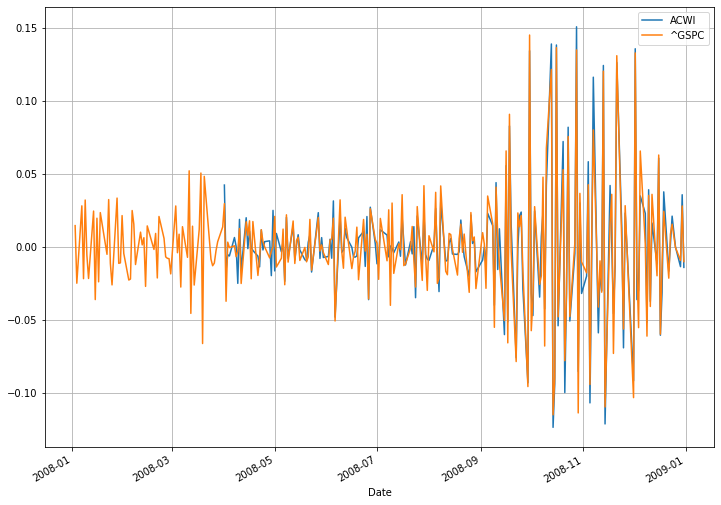

In [12]:
norm_data.Close.loc['2008'].diff().plot(grid=True, figsize=(12,9));

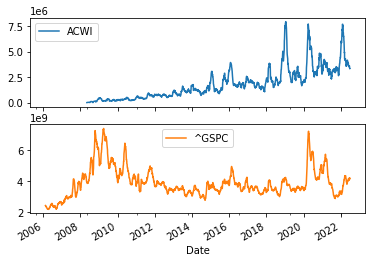

In [13]:
data.Volume.loc['2006':].rolling(30).mean().plot(subplots=True);

In [14]:
close_v = pd.DataFrame({'Close':data.Close.ACWI, 'Vol':data.Volume.ACWI}).dropna()

In [15]:
close_v.corr()

,Close,Vol
Close,1.000000,0.534614
Vol,0.534614,1.000000


<AxesSubplot:>

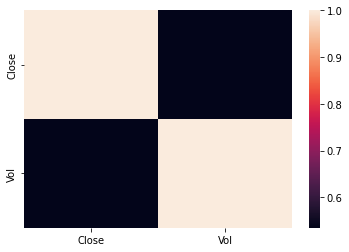

In [16]:
sns.heatmap(close_v.corr())

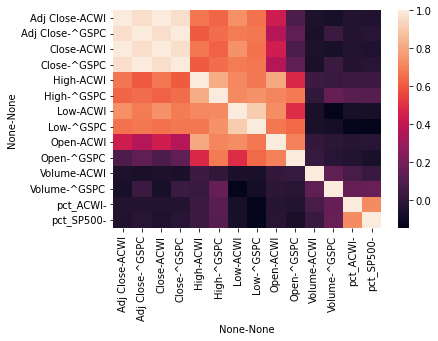

In [17]:
sns.heatmap(norm_data.corr());

In [18]:
norm_data.corr()

Adj Close               Close                High            \
                     ACWI     ^GSPC      ACWI     ^GSPC      ACWI     ^GSPC   
Adj Close ACWI   1.000000  0.963516  0.997750  0.963516  0.670423  0.624297   
          ^GSPC  0.963516  1.000000  0.961302  1.000000  0.604473  0.647397   
Close     ACWI   0.997750  0.961302  1.000000  0.961302  0.673901  0.623419   
          ^GSPC  0.963516  1.000000  0.961302  1.000000  0.604473  0.647397   
High      ACWI   0.670423  0.604473  0.673901  0.604473  1.000000  0.813575   
          ^GSPC  0.624297  0.647397  0.623419  0.647397  0.813575  1.000000   
Low       ACWI   0.740219  0.683349  0.743533  0.683349  0.717639  0.719238   
          ^GSPC  0.659772  0.675958  0.658879  0.675958  0.674127  0.744650   
Open      ACWI   0.433325  0.368563  0.436795  0.368563  0.800638  0.712570   
          ^GSPC  0.084984  0.137069  0.086160  0.137069  0.476707  0.681701   
Volume    ACWI  -0.059306 -0.067244 -0.058814 -0.067244  0.036617  0.004536   
          ^GSPC -0.071335  0.030558 -0.071059  0.030558  0.020451  0.154122   
pct_ACWI        -0.038958 -0.037108 -0.038583 -0.037108  0.033626  0.117174   
pct_SP500       -0.047350 -0.021178 -0.049223 -0.021178  0.035670  0.109470   

                      Low                Open              Volume            \
                     ACWI     ^GSPC      ACWI     ^GSPC      ACWI     ^GSPC   
Adj Close ACWI   0.740219  0.659772  0.433325  0.084984 -0.059306 -0.071335   
          ^GSPC  0.683349  0.675958  0.368563  0.137069 -0.067244  0.030558   
Close     ACWI   0.743533  0.658879  0.436795  0.086160 -0.058814 -0.071059   
          ^GSPC  0.683349  0.675958  0.368563  0.137069 -0.067244  0.030558   
High      ACWI   0.717639  0.674127  0.800638  0.476707  0.036617  0.020451   
          ^GSPC  0.719238  0.744650  0.712570  0.681701  0.004536  0.154122   
Low       ACWI   1.000000  0.905398  0.728537  0.489883 -0.066206 -0.139562   
          ^GSPC  0.905398  1.000000  0.677605  0.638675 -0.067246 -0.078962   
Open      ACWI   0.728537  0.677605  1.000000  0.699452  0.009163 -0.015133   
          ^GSPC  0.489883  0.638675  0.699452  1.000000  0.015638 -0.024334   
Volume    ACWI  -0.066206 -0.067246  0.009163  0.015638  1.000000  0.140435   
          ^GSPC -0.139562 -0.078962 -0.015133 -0.024334  0.140435  1.000000   
pct_ACWI        -0.078523 -0.136963 -0.030216 -0.040487  0.071752  0.156920   
pct_SP500       -0.074067 -0.145919 -0.020705 -0.069262  0.028322  0.160567   

                 pct_ACWI pct_SP500  
                                     
Adj Close ACWI  -0.038958 -0.047350  
          ^GSPC -0.037108 -0.021178  
Close     ACWI  -0.038583 -0.049223  
          ^GSPC -0.037108 -0.021178  
High      ACWI   0.033626  0.035670  
          ^GSPC  0.117174  0.109470  
Low       ACWI  -0.078523 -0.074067  
          ^GSPC -0.136963 -0.145919  
Open      ACWI  -0.030216 -0.020705  
          ^GSPC -0.040487 -0.069262  
Volume    ACWI   0.071752  0.028322  
          ^GSPC  0.156920  0.160567  
pct_ACWI         1.000000  0.724209  
pct_SP500        0.724209  1.000000

In [19]:
data.Close['2008':].describe()

,ACWI,^GSPC
count,3589.000000,3648.000000
mean,60.660808,2165.630238
std,18.223220,992.860274
min,23.930000,676.530029
25%,46.810001,1329.389984
50%,58.020000,2019.530029
75%,71.989998,2775.607544
max,107.230003,4796.560059


In [20]:
data.pct_SP500.groupby(data.index.year).sum().describe()

count    73.000000
mean      0.086798
std       0.158778
min      -0.401459
25%       0.004678
50%       0.114468
75%       0.210538
max       0.376397
Name: pct_SP500, dtype: float64

In [21]:
pct_change_ACWI = data.pct_ACWI.dropna()
pct_change_ACWI.groupby(pct_change_ACWI.index.year).sum().describe()

count    15.000000
mean      0.056746
std       0.181086
min      -0.355112
25%      -0.052366
50%       0.123728
75%       0.187670
max       0.310231
Name: pct_ACWI, dtype: float64

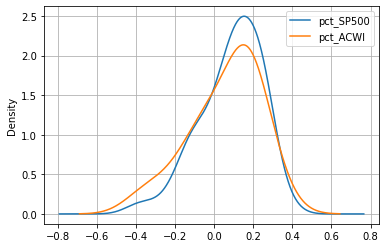

In [22]:
data.pct_SP500.groupby(data.index.year).sum().plot(kind='density', grid=True, legend=True);
pct_change_ACWI.groupby(pct_change_ACWI.index.year).sum().plot(kind='density', grid=True, legend=True);

## World stock indexes

In [23]:
import requests
site = 'https://finance.yahoo.com/world-indices'
tables = pd.read_html(requests.get(site, headers={'User-agent': 'Mozilla/5.0'}).text)
x = np.reshape(tables, (36, 9))
df =  pd.DataFrame(x, columns=['Symbol', 'Name', 'Last Price', 'Change', '% Change', 'Volume', 'I', '52',  'Day'])
df.drop(['I', '52', 'Day'], axis=1, inplace=True)

In [24]:
df

,Symbol,Name,Last Price,Change,% Change,Volume
0,^GSPC,S&P 500,3821.55,-78.56,-2.01%,2.253B
1,^DJI,Dow Jones Industrial Average,30946.99,-491.31,-1.56%,353.773M
2,^IXIC,NASDAQ Composite,11181.54,-343.06,-2.98%,4.812B
3,^NYA,NYSE COMPOSITE (DJ),14667.32,-167.98,-1.13%,0
4,^XAX,NYSE AMEX COMPOSITE INDEX,3981.45,56.59,+1.44%,0
5,^BUK100P,Cboe UK 100,727.25,-3.46,-0.47%,0
6,^RUT,Russell 2000,1738.84,-32.9,-1.86%,0
7,^VIX,Vix,28.62,1.67,+6.20%,0
8,^FTSE,FTSE 100,7292.83,-30.58,-0.42%,0
9,^GDAXI,DAX PERFORMANCE-INDEX,13080.5,-151.32,-1.14%,0


In [25]:
df.Symbol.sort_values()

17    000001.SS
18    399001.SZ
14     IMOEX.ME
21        ^AORD
20        ^AXJO
13         ^BFX
22       ^BSESN
5      ^BUK100P
29        ^BVSP
34      ^CASE30
1          ^DJI
10        ^FCHI
8         ^FTSE
9        ^GDAXI
0         ^GSPC
28      ^GSPTSE
16         ^HSI
31        ^IPSA
2         ^IXIC
23        ^JKSE
35     ^JN0U.JO
24        ^KLSE
26        ^KS11
32        ^MERV
30         ^MXX
12        ^N100
15        ^N225
3          ^NYA
25        ^NZ50
6          ^RUT
19         ^STI
11    ^STOXX50E
33    ^TA125.TA
27        ^TWII
7          ^VIX
4          ^XAX
Name: Symbol, dtype: object

In [26]:
df1 = df.sort_values(by=['Symbol'])

In [27]:
ticker_list = [ticker for ticker in df.Symbol]
ticker_list.remove('^CASE30')
n_list = [name for name in df1.Name]
n_list.remove('EGX 30 Price Return Index')

In [28]:
data = yf.download(ticker_list)

[*********************100%***********************]  35 of 35 completed


In [29]:
f_data = data.interpolate()
f_data

Adj Close                                                       \
              000001.SS     399001.SZ     IMOEX.ME        ^AORD        ^AXJO   
Date                                                                           
1950-01-03          NaN           NaN          NaN          NaN          NaN   
1950-01-04          NaN           NaN          NaN          NaN          NaN   
1950-01-05          NaN           NaN          NaN          NaN          NaN   
1950-01-06          NaN           NaN          NaN          NaN          NaN   
1950-01-09          NaN           NaN          NaN          NaN          NaN   
...                 ...           ...          ...          ...          ...   
2022-06-24  3349.750000  12686.030273  2391.510010  6762.399902  6578.700195   
2022-06-26  3364.469971  12755.800293  2404.285034  6828.000000  6642.350098   
2022-06-27  3379.189941  12825.570312  2417.060059  6893.600098  6706.000000   
2022-06-28  3409.209961  12982.690430  2408.750000  6953.399902  6763.600098   
2022-06-29  3361.517578  12696.504883  2379.050049  6877.899902  6700.200195   

                                                                           \
                   ^BFX        ^BSESN    ^BUK100P     ^BVSP          ^DJI   
Date                                                                        
1950-01-03          NaN           NaN         NaN       NaN           NaN   
1950-01-04          NaN           NaN         NaN       NaN           NaN   
1950-01-05          NaN           NaN         NaN       NaN           NaN   
1950-01-06          NaN           NaN         NaN       NaN           NaN   
1950-01-09          NaN           NaN         NaN       NaN           NaN   
...                 ...           ...         ...       ...           ...   
2022-06-24  3685.550049  52727.980469  719.150024   98672.0  31500.679688   
2022-06-26  3712.025024  52944.630859  722.130005   99718.0  31469.469727   
2022-06-27  3738.500000  53161.281250  725.109985  100764.0  31438.259766   
2022-06-28  3746.070068  53177.449219  730.719971  100591.0  30946.990234   
2022-06-29  3721.110107  53134.589844  727.198608  100591.0  30946.990234   

            ...      Volume                                          \
            ...       ^N225          ^NYA       ^NZ50          ^RUT   
Date        ...                                                       
1950-01-03  ...         NaN           NaN         NaN           NaN   
1950-01-04  ...         NaN           NaN         NaN           NaN   
1950-01-05  ...         NaN           NaN         NaN           NaN   
1950-01-06  ...         NaN           NaN         NaN           NaN   
1950-01-09  ...         NaN           NaN         NaN           NaN   
...         ...         ...           ...         ...           ...   
2022-06-24  ...  72600000.0  6.742870e+09  21256500.0  6.742870e+09   
2022-06-26  ...  69200000.0  5.063995e+09  21585900.0  5.063995e+09   
2022-06-27  ...  65800000.0  3.385120e+09  21915300.0  3.385120e+09   
2022-06-28  ...  73400000.0  3.590980e+09  17985900.0  3.590980e+09   
2022-06-29  ...         0.0  3.590980e+09         0.0  3.590980e+09   

                                                                      
                   ^STI   ^STOXX50E   ^TA125.TA      ^TWII ^VIX ^XAX  
Date                                                                  
1950-01-03          NaN         NaN         NaN        NaN  NaN  NaN  
1950-01-04          NaN         NaN         NaN        NaN  NaN  NaN  
1950-01-05          NaN         NaN         NaN        NaN  NaN  NaN  
1950-01-06          NaN         NaN         NaN        NaN  NaN  NaN  
1950-01-09          NaN         NaN         NaN        NaN  NaN  NaN  
...                 ...         ...         ...        ...  ...  ...  
2022-06-24  183736700.0  33373800.0  62553600.0  3081400.0  0.0  0.0  
2022-06-26  211314150.0  33288200.0  39639600.0  3101100.0  0.0  0.0  
2022-06-27  238891600.0  33202600.0  6

In [30]:
norm_data = np.log(f_data/f_data.shift(1))

In [31]:
norm_data

Adj Close                                                    \
           000001.SS 399001.SZ  IMOEX.ME     ^AORD     ^AXJO      ^BFX   
Date                                                                     
1950-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
1950-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
1950-01-05       NaN       NaN       NaN       NaN       NaN       NaN   
1950-01-06       NaN       NaN       NaN       NaN       NaN       NaN   
1950-01-09       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2022-06-24  0.008876  0.013595 -0.005434  0.010555  0.007675  0.010455   
2022-06-26  0.004385  0.005485  0.005328  0.009654  0.009629  0.007158   
2022-06-27  0.004366  0.005455  0.005299  0.009562  0.009537  0.007107   
2022-06-28  0.008845  0.012176 -0.003444  0.008637  0.008553  0.002023   
2022-06-29 -0.014088 -0.022290 -0.012407 -0.010917 -0.009418 -0.006685   

                                                    ...    Volume            \
              ^BSESN  ^BUK100P     ^BVSP      ^DJI  ...     ^N225      ^NYA   
Date                                                ...                       
1950-01-03       NaN       NaN       NaN       NaN  ...       NaN       NaN   
1950-01-04       NaN       NaN       NaN       NaN  ...       NaN       NaN   
1950-01-05       NaN       NaN       NaN       NaN  ...       NaN       NaN   
1950-01-06       NaN       NaN       NaN       NaN  ...       NaN       NaN   
1950-01-09       NaN       NaN       NaN       NaN  ...       NaN       NaN   
...              ...       ...       ...       ...  ...       ...       ...   
2022-06-24  0.008806  0.026790  0.006018  0.026484  ...  0.099866  0.502854   
2022-06-26  0.004100  0.004135  0.010545 -0.000991  ... -0.047964 -0.286330   
2022-06-27  0.004084  0.004118  0.010435 -0.000992  ... -0.050381 -0.402766   
2022-06-28  0.000304  0.007707 -0.001718 -0.015750  ...  0.109304  0.059036   
2022-06-29 -0.000806 -0.004831  0.000000  0.000000  ...      -inf  0.000000   

                                                                             \
               ^NZ50      ^RUT      ^STI ^STOXX50E ^TA125.TA     ^TWII ^VIX   
Date                                                                          
1950-01-03       NaN       NaN       NaN       NaN       NaN       NaN  NaN   
1950-01-04       NaN       NaN       NaN       NaN       NaN       NaN  NaN   
1950-01-05       NaN       NaN       NaN       NaN       NaN       NaN  NaN   
1950-01-06       NaN       NaN       NaN       NaN       NaN       NaN  NaN   
1950-01-09       NaN       NaN       NaN       NaN       NaN       NaN  NaN   
...              ...       ...       ...       ...       ...       ...  ...   
2022-06-24  0.015618  0.502854 -0.116070 -0.170381 -0.312114 -0.239840  NaN   
2022-06-26  0.015378 -0.286330  0.139842 -0.002568 -0.456195  0.006373  NaN   
2022-06-27  0.015145 -0.402766  0.122664 -0.002575  0.432482  0.006332  NaN   
2022-06-28 -0.197597  0.059036 -0.091985 -0.163288  0.257308 -0.008398  NaN   
2022-06-29      -inf  0.000000      -inf      -inf      -inf      -inf  NaN   

                 
           ^XAX  
Date             
1950-01-03  NaN  
1950-01-04  NaN  
1950-01-05  NaN  
1950-01-06  NaN  
1950-01-09  NaN  
...         ...  
2022-06-24  NaN  
2022-06-26  NaN  
2022-06-27  NaN  
2022-06-28  NaN  
2022-06-29  NaN  

[18953 rows x 210 columns]

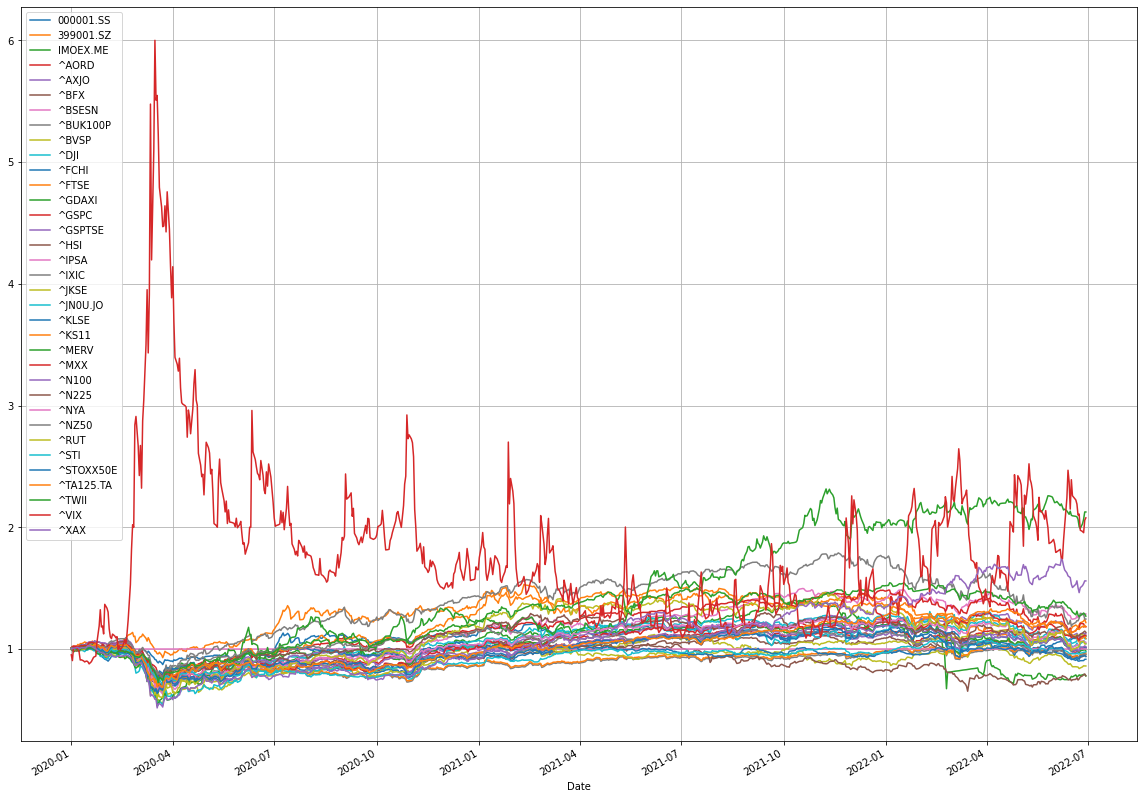

In [32]:
norm_data['Adj Close']['2020':].cumsum().apply(np.exp).plot(figsize=(20,15), grid=True);

In [45]:
c = data['Adj Close']
close = c.interpolate()
norm_c = normalize_data(close)
close.columns = n_list

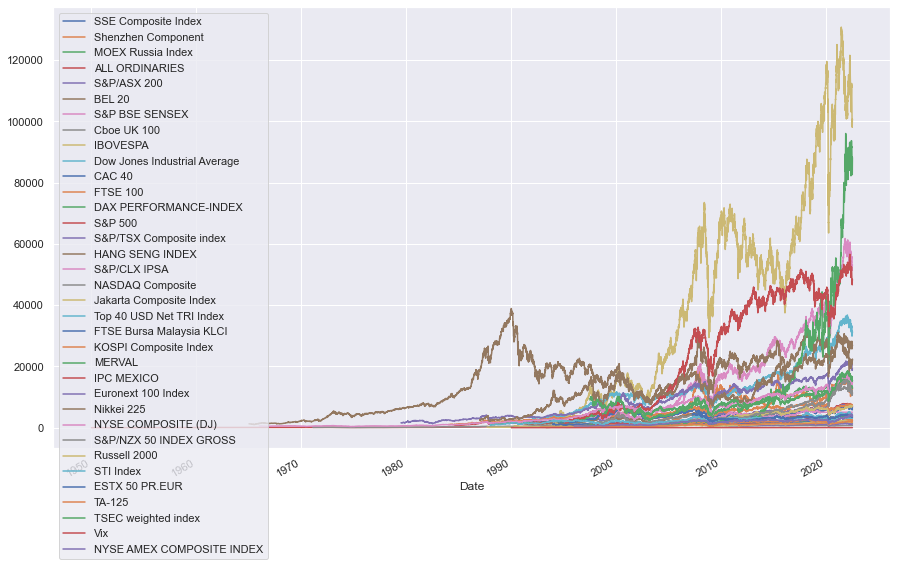

In [46]:
close.plot(figsize=(15,9));

In [47]:
perc_change = close / close.shift(1) - 1

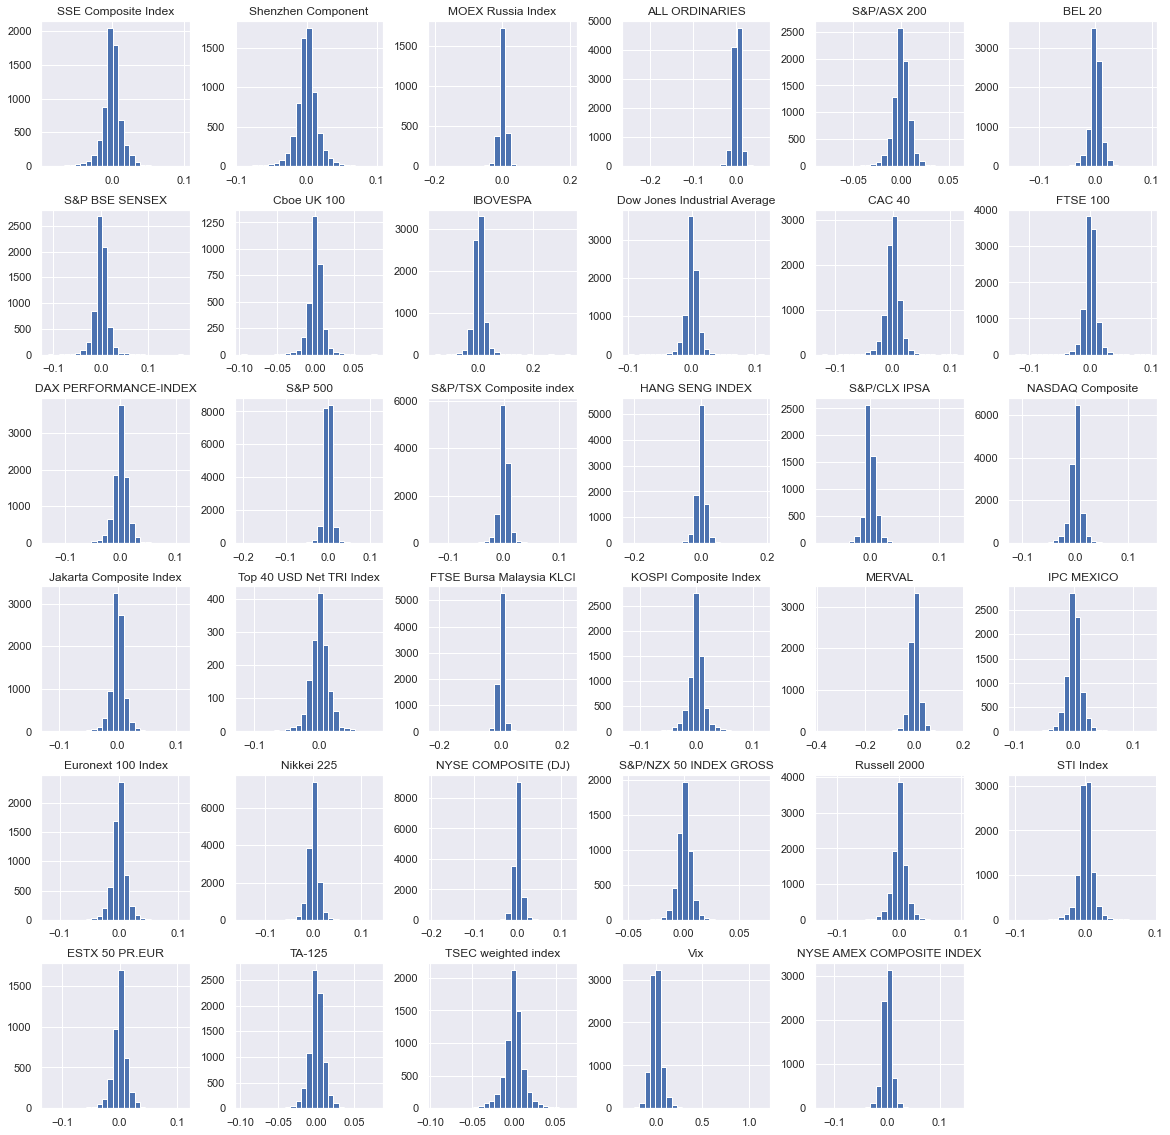

In [48]:
perc_change.hist(figsize=(20,20), bins=25);

In [49]:
close.groupby(close.index.year).last().pct_change().fillna(0).mean() * 100

SSE Composite Index              3.874095
Shenzhen Component               4.976220
MOEX Russia Index                0.905755
ALL ORDINARIES                   3.964140
S&P/ASX 200                      2.526788
BEL 20                           2.701281
S&P BSE SENSEX                   5.448357
Cboe UK 100                      0.367084
IBOVESPA                        21.188143
Dow Jones Industrial Average     3.654164
CAC 40                           2.852923
FTSE 100                         3.033882
DAX PERFORMANCE-INDEX            4.924868
S&P 500                          8.781856
S&P/TSX Composite index          4.001683
HANG SENG INDEX                  4.972157
S&P/CLX IPSA                     2.824658
NASDAQ Composite                 8.754975
Jakarta Composite Index          6.580619
Top 40 USD Net TRI Index        -0.080600
FTSE Bursa Malaysia KLCI         1.117019
KOSPI Composite Index            3.454110
MERVAL                          10.149206
IPC MEXICO                       6

In [50]:
perc_change.groupby(perc_change.index.year).sum().std() * 100

SSE Composite Index             21.617964
Shenzhen Component              25.067567
MOEX Russia Index                7.049722
ALL ORDINARIES                  12.700163
S&P/ASX 200                     10.075195
BEL 20                          14.312664
S&P BSE SENSEX                  18.193010
Cboe UK 100                      4.138467
IBOVESPA                        48.731420
Dow Jones Industrial Average    10.141033
CAC 40                          13.574770
FTSE 100                        10.578218
DAX PERFORMANCE-INDEX           15.931088
S&P 500                         15.868175
S&P/TSX Composite index         11.681750
HANG SENG INDEX                 18.791455
S&P/CLX IPSA                    10.586149
NASDAQ Composite                20.418308
Jakarta Composite Index         22.899347
Top 40 USD Net TRI Index         4.239648
FTSE Bursa Malaysia KLCI        14.144245
KOSPI Composite Index           18.482598
MERVAL                          24.751671
IPC MEXICO                      15

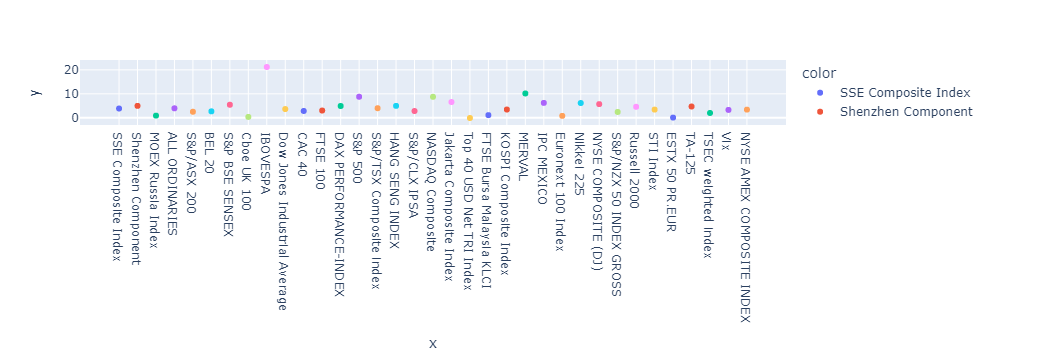

In [51]:
fig = px.scatter(x=close.columns, y=close.groupby(close.index.year).last().pct_change().fillna(0).mean() * 100, color=close.columns)
fig.show()

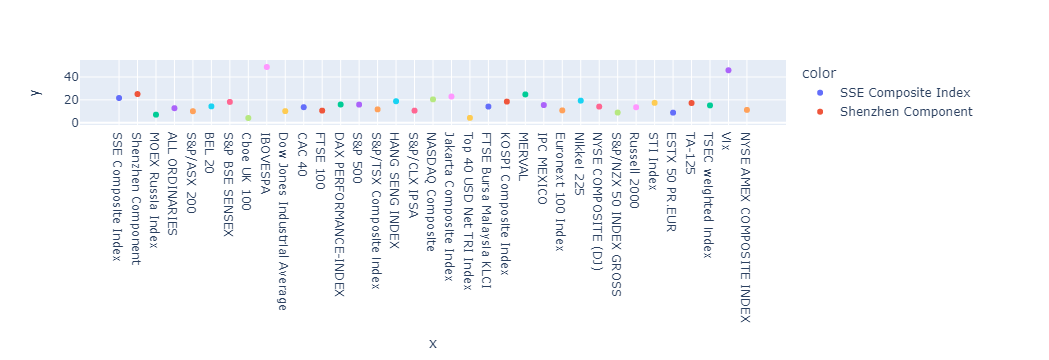

In [52]:
fig = px.scatter(x=close.columns, y=perc_change.groupby(perc_change.index.year).sum().std() * 100, color=close.columns)
fig.show()

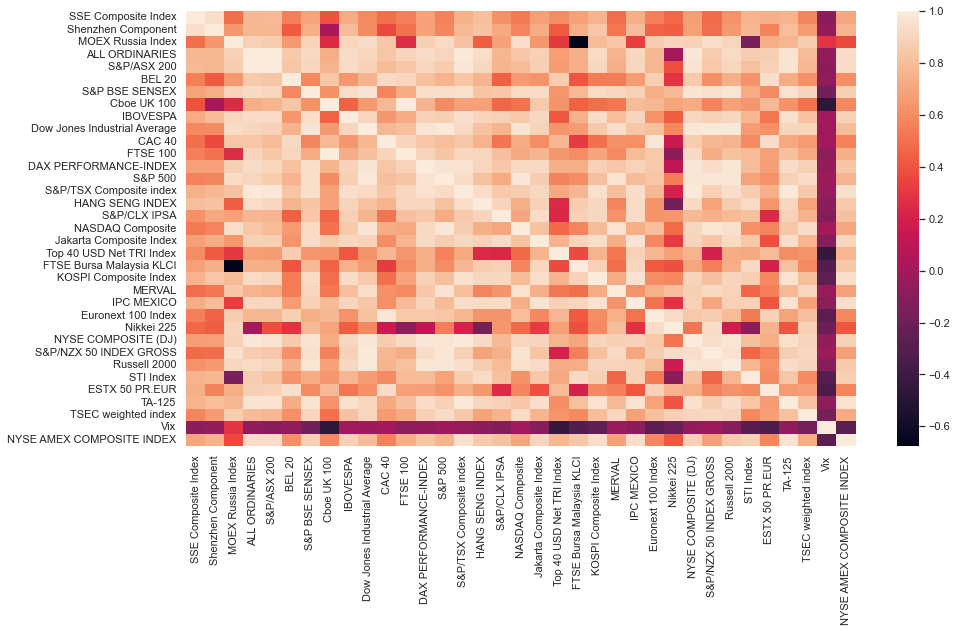

In [53]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(close.corr());

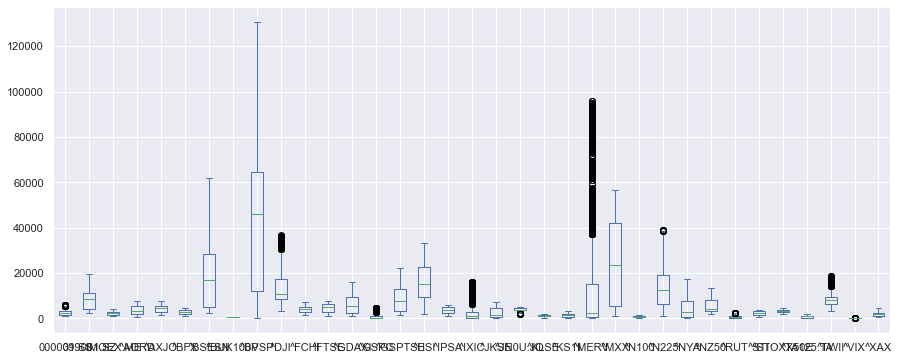

In [42]:
close.plot(kind='box', figsize=(15,6));